In [81]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import japanize_matplotlib

## Introduction
In this project, I want to answer the question "When do baseball players peak their performance?". I believe there are two main timelines that affect player performance (although I believe there could be more), which are 1) How long a player has played in the professional league, and 2) Player's age. Through this analysis I want to determine the age of peak performance where he has enough experience but is not too old to suffer physical/health issues.

## Hypothesis
My hypothesis is that a player will peak their performance at the age of 25-27. If a player was drafted out of high school, he would've spent 7 years in the professional league, and in those years their body must've changed and grew mentally as well. However, the peak age could be different if they were drafted during/after college or from amature league.

## Analysis
First analyze few players individually (those who are older than 30 is ideal for long time analysis)

In [6]:
data_path = 'data_collection/player_stats/ヤクルト.json'
with open(data_path, 'r') as f:
    yakult_json = json.load(f)

In [12]:
dataframes = []

for player_id, player_data in yakult_json.items():
    name = player_data['name']
    stats = player_data['stats']
    
    player_df = pd.DataFrame.from_dict(stats, orient='index')
    
    player_df['PlayerID'] = player_id
    player_df['Name'] = name
    
    player_df.reset_index(inplace=True)
    player_df.rename(columns={'index': 'Year'}, inplace=True)
    
    dataframes.append(player_df)

yakult_df = pd.concat(dataframes, ignore_index=True)
yakult_df = yakult_df[['PlayerID', 'Name', 'Year'] + [col for col in yakult_df.columns if col not in ['PlayerID', 'Name', 'Year']]]

print(yakult_df.head())

  PlayerID   Name  Year TeamCD  BattingAverage  Game  PlateAppearance  AtBat  \
0   600011  川端　慎吾  2023      2           0.319    80              105     94   
1   600011  川端　慎吾  2022      2           0.175    52               64     57   
2   600011  川端　慎吾  2021      2           0.372    91               93     86   
3   600011  川端　慎吾  2020      2           0.128    39               42     39   
4   600011  川端　慎吾  2019      2           0.164    37               67     61   

   Run  Hit  ...  HitByPitch  SacrificeHit  SacrificeFly  StolenBase  \
0    4   30  ...           1             1             0           0   
1    1   10  ...           1             0             2           0   
2    8   32  ...           0             0             0           0   
3    3    5  ...           0             0             0           0   
4    5   10  ...           0             0             1           0   

   CaughtStealing  DoublePlay  Error  Slugging  OnBase    Ops  
0               0     

In [29]:
yakult_df['Year'] = yakult_df['Year'].astype(int)

In [59]:
# function that plots AVG, OBP, SLG
def plot_player_data(player_id: str):
    player_data = yakult_df[yakult_df['PlayerID'] == player_id]
    player_data.sort_values(by=['Year'], ascending=True, inplace=True)

    plt.figure(figsize=(8, 5))
    
    sns.lineplot(data=player_data, x='Year', y='BattingAverage', marker='o', label='Batting Average')
    sns.lineplot(data=player_data, x='Year', y='OnBase', marker='o', label='On-Base Percentage')
    sns.lineplot(data=player_data, x='Year', y='Slugging', marker='o', label='Slugging Percentage')

    plt.xlabel('Year')
    plt.ylabel('Metrics')
    plt.xticks(player_data['Year'], rotation=45)
    plt.title(f"Player Stats Over the Years for {player_data['Name'].iloc[0]} (ID: {player_id})")
    plt.legend()
    plt.grid(color='lightgray')

    plt.show()

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


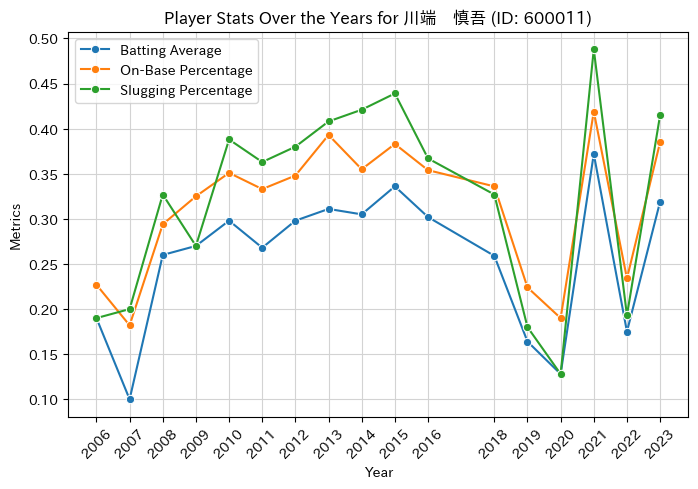

In [60]:
plot_player_data('600011')

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


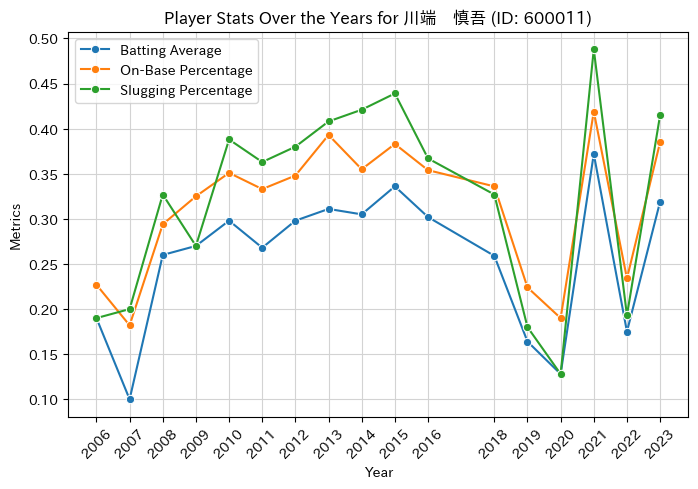

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


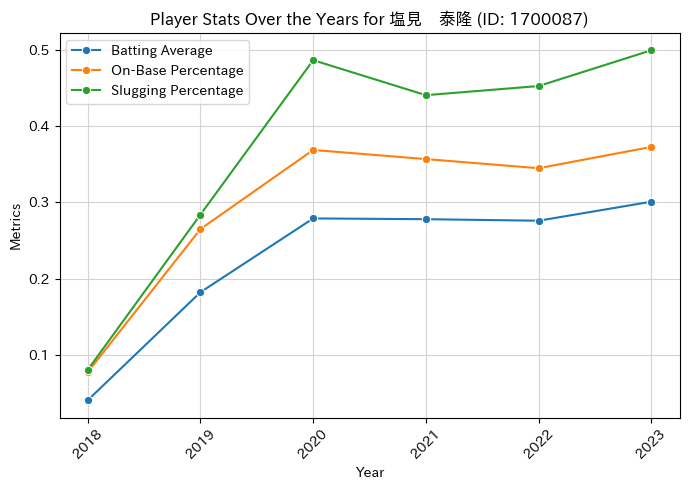

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


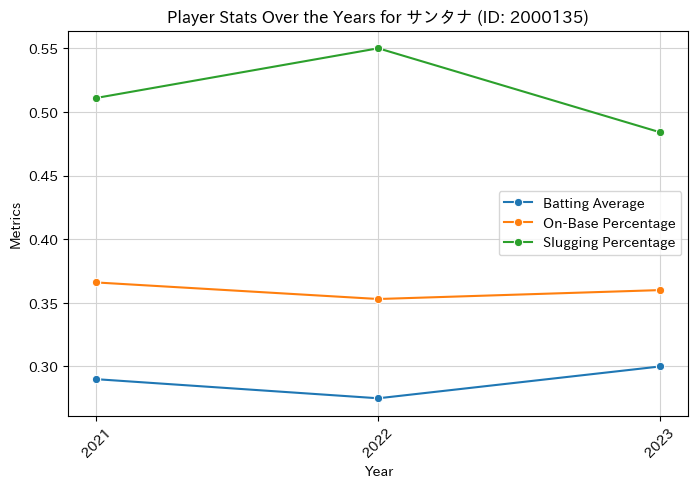

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


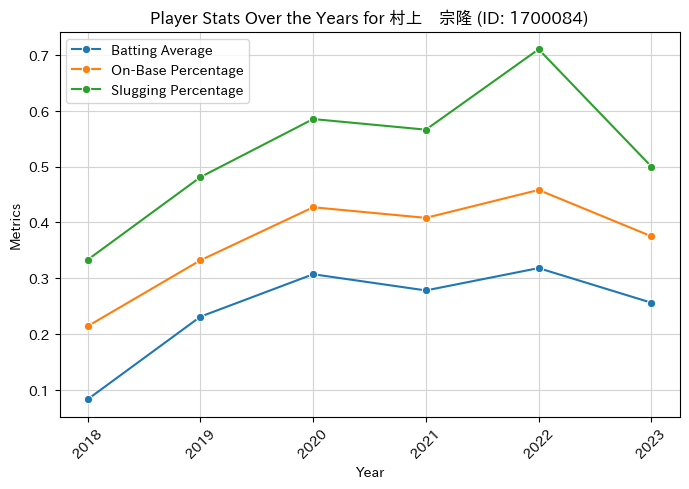

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


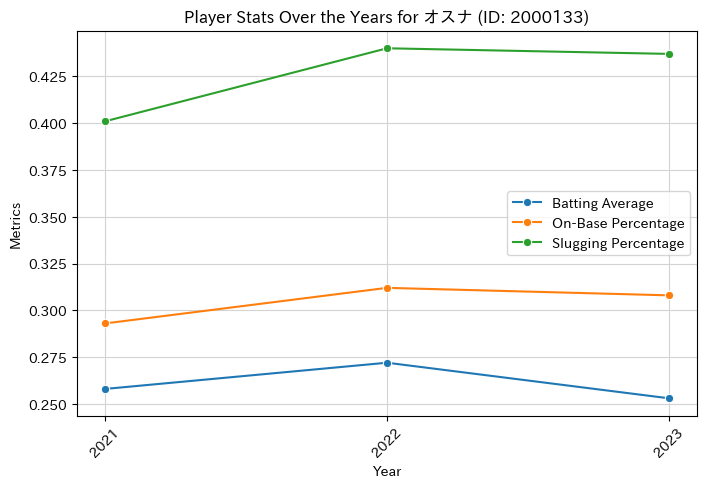

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


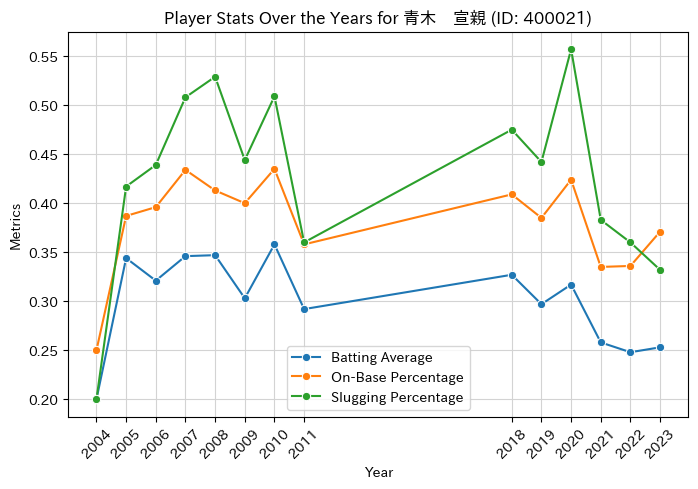

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


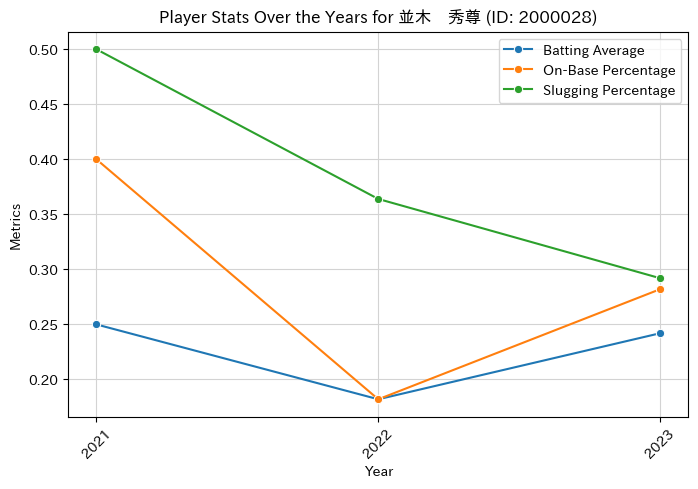

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


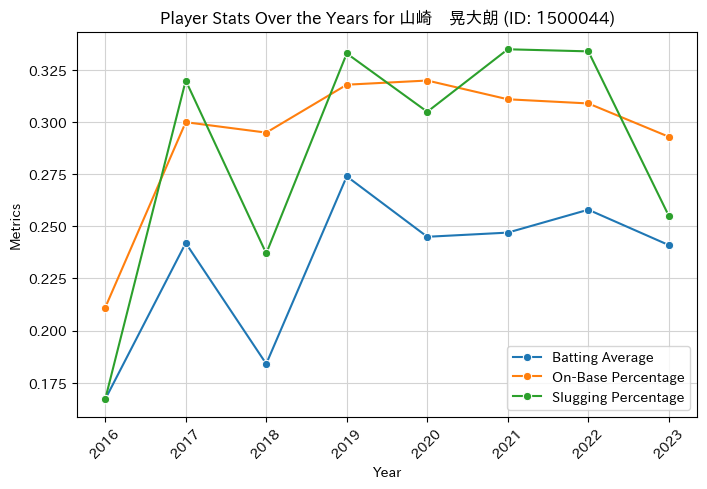

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


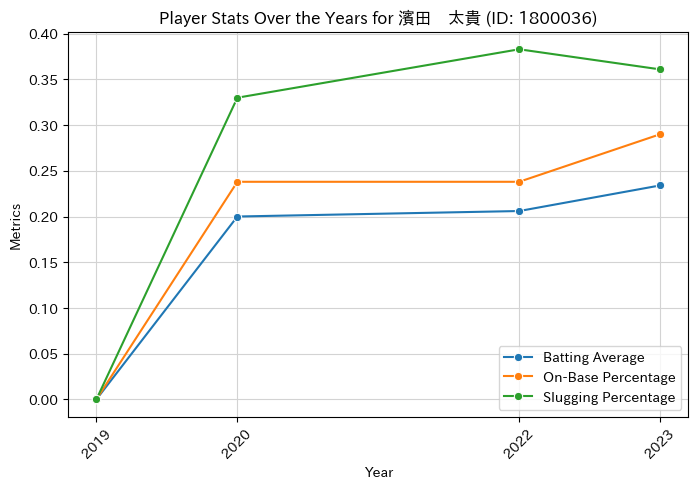

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


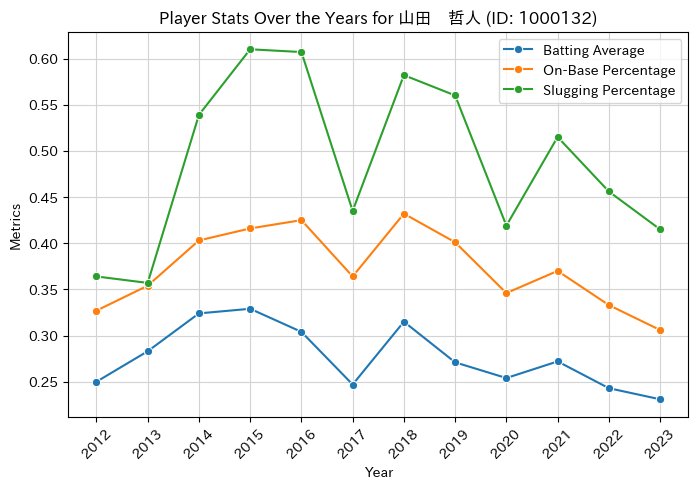

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


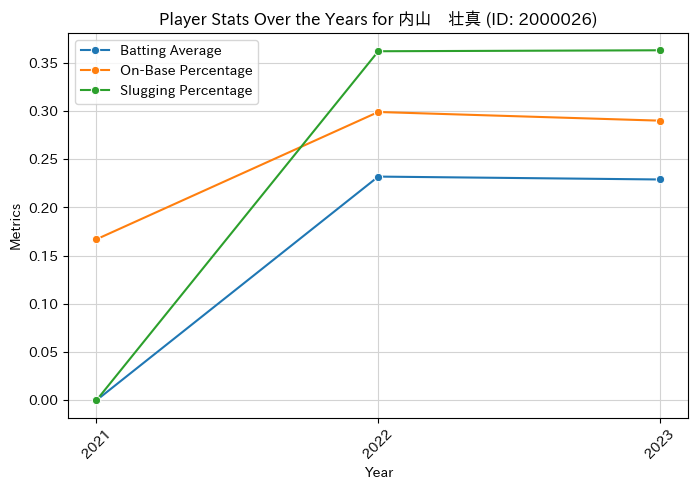

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


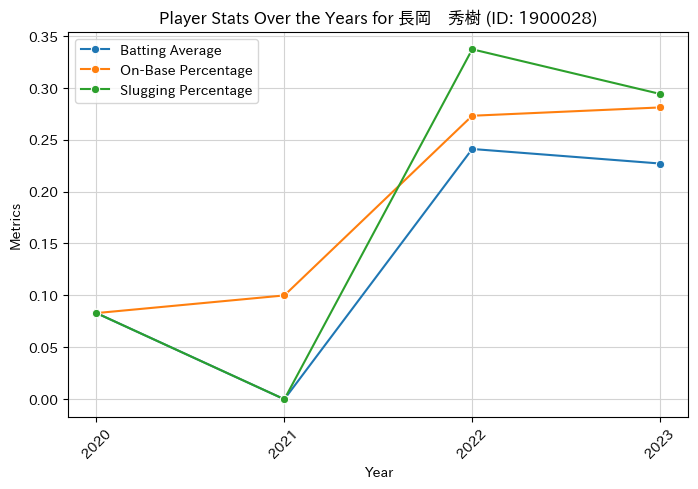

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


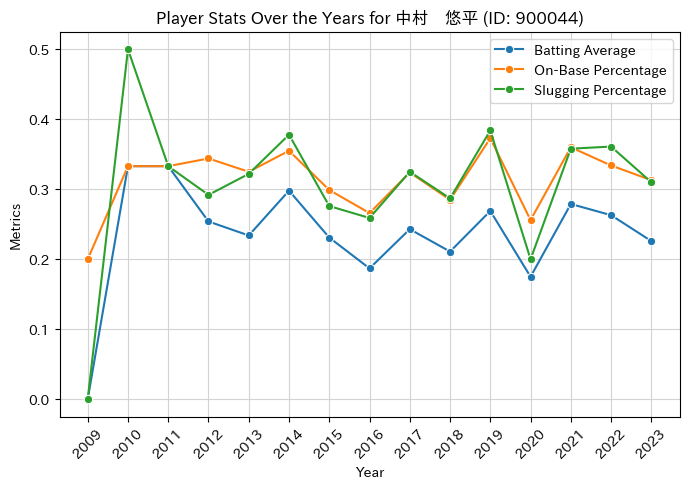

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


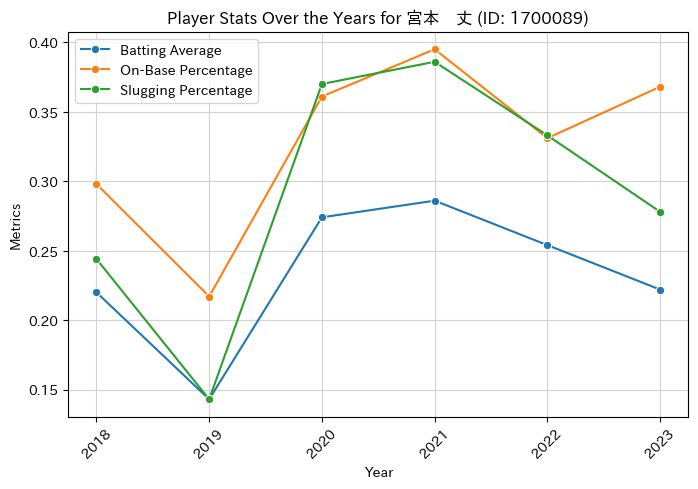

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


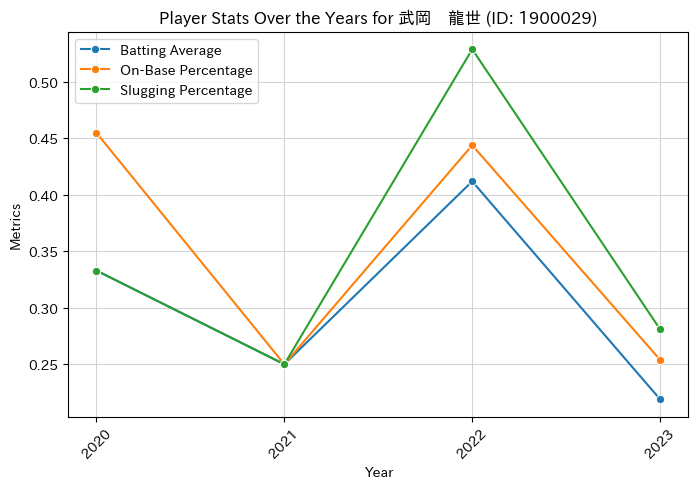

/var/folders/8y/d3d0zw7114b152l8r0nt_28c0000gn/T/ipykernel_58223/2629061867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.sort_values(by=['Year'], ascending=True, inplace=True)


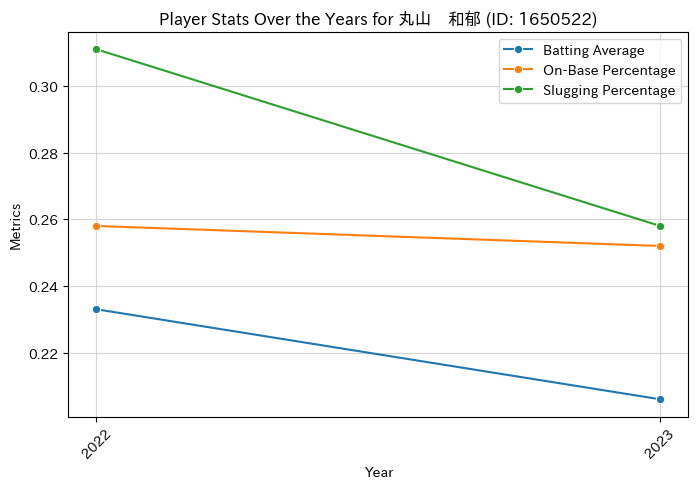

In [61]:
for player_id in yakult_df['PlayerID'].unique():
    plot_player_data(player_id)

At glance, it is difficult to see if there is any trend for their performance, but this is limited to one team, and many players are relatively young and haven't played many seasons, so it is difficult to see long-term trend. However, a few players who we have data of over 5 seasons seemed to have a drop aon 2020 or 2021. This could be due to the global pandemic, where players were restricted in training, games, and some of them even got sick themselves. 

I will then try to gather data for all players from all teams (at least those that I have data for), filter to those who we have data for over 5 seasons, and determine if I can find any trends. I will not only look at plots but will also compare numeric values such as average and extremes.

In [62]:
# create a dataframe with all players from all teams
def create_team_df(team_name_eng: str, json_path: str) -> pd.DataFrame:
    with open(json_path, 'r') as f:
        team_json = json.load(f)

    dataframes = []

    for player_id, player_data in team_json.items():
        name = player_data['name']
        stats = player_data['stats']
        
        player_df = pd.DataFrame.from_dict(stats, orient='index')
        
        player_df['PlayerID'] = player_id
        player_df['Name'] = name
        player_df['TeamName'] = team_name_eng
        
        player_df.reset_index(inplace=True)
        player_df.rename(columns={'index': 'Year'}, inplace=True)
        
        dataframes.append(player_df)

    team_df = pd.concat(dataframes, ignore_index=True)
    team_df = team_df[['PlayerID', 'Name', 'Year', 'TeamName'] + [col for col in yakult_df.columns if col not in ['PlayerID', 'Name', 'Year', 'TeamName']]]

    return team_df

In [74]:
data_dir = 'data_collection/player_stats'
json_files = sorted([f for f in listdir(data_dir) if isfile(join(data_dir, f))])
team_names_eng = [
    'YOKOHAMA DeNA BAYSTARS',
    'ORIX Buffaloes',
    'Fukuoka SoftBank Hawks',
    'Tokyo Yakult Swallows',
    'Chiba Lotte Marines',
    'Chunichi Dragons',
    'Yomiuri Giants',
    'Hiroshima Toyo Carp',
    'Hokkaido Nippon-Ham Fighters',
    'Tohoku Rakuten Golden Eagles',
    'Saitama Seibu Lions',
    'Hanshin Tigers'
]

In [75]:
# check two lists correspond correctly
for json_file, team_name in zip(json_files, team_names_eng):
    print(f'{json_file},      {team_name}')

DeNA.json,      YOKOHAMA DeNA BAYSTARS
オリックス.json,      ORIX Buffaloes
ソフトバンク.json,      Fukuoka SoftBank Hawks
ヤクルト.json,      Tokyo Yakult Swallows
ロッテ.json,      Chiba Lotte Marines
中日.json,      Chunichi Dragons
巨人.json,      Yomiuri Giants
広島.json,      Hiroshima Toyo Carp
日本ハム.json,      Hokkaido Nippon-Ham Fighters
楽天.json,      Tohoku Rakuten Golden Eagles
西武.json,      Saitama Seibu Lions
阪神.json,      Hanshin Tigers


In [79]:
team_dfs = []

for json_file, team_name in zip(json_files, team_names_eng):
    json_path = join(data_dir, json_file)
    team_dfs.append(create_team_df(team_name, json_path))

all_df = pd.concat(team_dfs, ignore_index=True)

In [80]:
all_df

,PlayerID,Name,Year,TeamName,TeamCD,BattingAverage,Game,PlateAppearance,AtBat,Run,...,HitByPitch,SacrificeHit,SacrificeFly,StolenBase,CaughtStealing,DoublePlay,Error,Slugging,OnBase,Ops
0,1200053,宮崎 敏郎,2023,YOKOHAMA DeNA BAYSTARS,3,0.326,124,461,408,47,...,8,0,4,1,0,14,9,0.539,0.395,0.934
1,1200053,宮崎 敏郎,2022,YOKOHAMA DeNA BAYSTARS,3,0.300,122,482,434,51,...,2,0,2,0,0,16,9,0.470,0.365,0.835
2,1200053,宮崎 敏郎,2021,YOKOHAMA DeNA BAYSTARS,3,0.301,141,569,519,61,...,4,0,5,0,0,15,5,0.455,0.353,0.808
3,1200053,宮崎 敏郎,2020,YOKOHAMA DeNA BAYSTARS,3,0.301,113,460,429,47,...,4,0,3,0,0,15,6,0.464,0.341,0.805
4,1200053,宮崎 敏郎,2019,YOKOHAMA DeNA BAYSTARS,3,0.284,114,473,433,54,...,3,0,5,0,0,13,5,0.443,0.334,0.777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,1700080,島田 海吏,2022,Hanshin Tigers,5,0.264,123,339,311,36,...,3,9,1,21,5,3,2,0.299,0.303,0.602
1168,1700080,島田 海吏,2021,Hanshin Tigers,5,0.243,57,78,70,7,...,0,3,0,8,1,0,0,0.286,0.293,0.579
1169,1700080,島田 海吏,2020,Hanshin Tigers,5,0.176,43,21,17,4,...,1,1,0,3,0,0,1,0.176,0.300,0.476
1170,1700080,島田 海吏,2019,Hanshin Tigers,5,0.250,7,5,4,2,...,0,0,0,0,0,0,0,0.500,0.400,0.900
